# Point 1

### 1.1

In [1]:
import pydicom
import os
import matplotlib.pyplot as plt

# Define the directory and file name
dicom_dir = 'data/raw/5/'
dicom_file_name = '1.2.840.4892943.343.5.202410071005064831.79.dcm'
# dicom_file_name = '1.2.392.200036.9116.2.6.1.44063.1796282914.1668384605.381481.dcm'
dicom_path = os.path.join(dicom_dir, dicom_file_name)

# Load the DICOM file
dicom_data = pydicom.dcmread(dicom_path)

In [2]:
# get what kind of image it is (RX, CT or RM)
print(f"Modality: {dicom_data.Modality}")

# get the image width and height
print(f"Rows: {dicom_data.Rows}, Columns: {dicom_data.Columns}")

Modality: CT
Rows: 403, Columns: 512


In [6]:
# Utilizar pydicom para extraer la metadata adjuntar anexo el notebook.
print(dicom_data.dir())

print(f"PatientName: {getattr(dicom_data, 'PatientName', 'Not present')}")
print(f"Modality: {getattr(dicom_data, 'Modality', 'Not present')}")
print(f"SliceThickness: {getattr(dicom_data, 'SliceThickness', 'Not present')}")
print(f"KVP: {getattr(dicom_data, 'KVP', 'Not present')}")
print(f"BodyPartExamined: {getattr(dicom_data, 'BodyPartExamined', 'Not present')}")
print(f"RelativeXRayExposure: {getattr(dicom_data, 'RelativeXRayExposure', 'Not present')}") # This is not present in the image
print(f"ExposureTime: {getattr(dicom_data, 'ExposureTime', 'Not present')}") # This is not present in the image
print(f"PhotometricInterpretation: {getattr(dicom_data, 'PhotometricInterpretation', 'Not present')}")
print(f"Manufacturer: {getattr(dicom_data, 'Manufacturer', 'Not present')}")
print(f"ScannerModel: {getattr(dicom_data, 'ScannerModel', 'Not present')}") # This is not present in the image

# Might be the ones that are not present in the image
print("\n")
print("Might be the ones that are not present in the image: ")
print(f"RelativeXRayExposure: {getattr(dicom_data, 'Exposure', 'Not present')}")
print(f"ExposureTime: {getattr(dicom_data, 'AcquisitionTime', 'Not present')}")
print(f"ScannerModel: {getattr(dicom_data, 'ManufacturerModelName', 'Not present')}")



['AccessionNumber', 'AcquisitionDate', 'AcquisitionNumber', 'AcquisitionTime', 'AdmissionID', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'BurnedInAnnotation', 'CTDIvol', 'CalciumScoringMassFactorDevice', 'CalciumScoringMassFactorPatient', 'Columns', 'ContentDate', 'ContentTime', 'DateOfLastCalibration', 'DeviceSerialNumber', 'Exposure', 'FrameOfReferenceUID', 'GantryDetectorTilt', 'GantryID', 'HighBit', 'ImageComments', 'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType', 'InstanceNumber', 'InstitutionAddress', 'InstitutionName', 'InstitutionalDepartmentName', 'KVP', 'LossyImageCompression', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'PatientAge', 'PatientBirthDate', 'PatientID', 'PatientName', 'PatientPosition', 'PatientSex', 'PatientSize', 'PatientWeight', 'PerformedProcedureStepDescription', 'PerformedProtocolCodeSequence', 'PerformingPhysicianName', 'PhotometricInterpretation', 'PixelData', 'PixelRepresentation', 'PixelSpacing', 'PositionReferenceIndica

In [4]:
# Organice  la  metadata  extraída  en  Name,  Tag,  Type  y  Value,  explique  a  qué  hace  referencia cada  uno  de  ellos,  el  grupo  al  que  pertenece,  su  relevancia  y  los  valores  válidos  para  ese metadato.
# Define attributes with descriptions
attributes_info = [
    {
     "name": "PatientName", 
     "description": "Contiene el nombre completo del paciente. El formato puede variar.", 
     "group": "Identificación del Paciente (Patient Identification)", 
     "relevance": "Fundamental para asociar la imagen médica correcta con el paciente correcto. Esencial para la seguridad del paciente y la gestión de registros médicos.",
     "valid_values": "Cualquier combinación de caracteres alfanuméricos, incluyendo espacios y caracteres especiales."},

    {
     "name": "Modality", 
     "description": "Indica el tipo de equipo o técnica de imagen utilizada para adquirir los datos (por ejemplo, Tomografía Computarizada, Resonancia Magnética,  Ultrasonido).",
     "group": "Adquisición de la Imagen (Image Acquisition)",
     "relevance": "Identifica la naturaleza fundamental de la imagen, lo cual afecta cómo se interpreta y procesa.",
     "valid_values": "Cadenas de código estandarizadas definidas en el estándar DICOM (ej. CT, MR, US, PT, CR, DX, MG, OT - Other)."},

    {
     "name": "SliceThickness", 
     "description": "Grosor nominal, en milímetros (mm), de cada corte o rebanada de la imagen.",
     "group": "Adquisición / Reconstrucción de la Imagen", 
     "relevance": "Crítico para entender la resolución espacial de la imagen en la dirección Z (profundidad). Afecta la capacidad de detectar pequeñas lesiones y la calidad de las reconstrucciones 3D.", 
     "valid_values": "Un número decimal positivo, representado como una cadena de texto."
    },
    
    {
     "name": "KVP", 
     "description": "El pico de kilovoltaje (kVp) aplicado al tubo de rayos X durante la adquisición. Solo relevante para modalidades basadas en rayos X (CT, CR, DX, MG).",
     "group": "Parámetros de Adquisición de Rayos X", 
     "relevance": "Determina la energía (poder de penetración) del haz de rayos X. Afecta directamente el contraste de la imagen y la dosis de radiación recibida por el paciente.", 
     "valid_values": "Un número decimal positivo, representado como una cadena de texto."
    },
    
    {
     "name": "BodyPartExamined", 
     "description": "Describe la región anatómica del cuerpo que fue examinada en el estudio.",
     "group": "Información del Estudio (Study Information)", 
     "relevance": "Proporciona contexto anatómico esencial para la interpretación de la imagen. Ayuda a organizar y buscar estudios.", 
     "valid_values": "Puede ser un término de una lista estandarizada (definida por DICOM o específica de la institución) o texto libre."
    },
    
    {
     "name": "RelativeXRayExposure", 
     "description": "La exposición total, generalmente expresada en miliamperio-segundos (mAs) o microamperio-segundos (µAs). Es el producto de la corriente del tubo (mA) y el tiempo de exposición (s). Relevante para modalidades de rayos X.",
     "group": "Parámetros de Adquisición de Rayos X", 
     "relevance": "Directamente relacionado con la cantidad de fotones de rayos X utilizados, lo que impacta el ruido de la imagen (calidad) y la dosis de radiación al paciente.", 
     "valid_values": "Un número entero, representado como una cadena de texto."
    },
    
    {
     "name": "ExposureTime", 
     "description": "Duración, comúnmente en milisegundos (ms), durante la cual el detector estuvo expuesto a la radiación (o el tubo de rayos X estuvo activo).",
     "group": "Parámetros de Adquisición de Rayos X", 
     "relevance": "Afecta la dosis de radiación y la probabilidad de artefactos por movimiento. Junto con la corriente del tubo (mA), determina la exposición total (mAs).", 
     "valid_values": "Un número decimal positivo, representado como una cadena de texto."
    },
    
    {
     "name": "PhotometricInterpretation", 
     "description": "Especifica cómo deben interpretarse los datos de píxeles para su correcta visualización. Indica si es una imagen en escala de grises o color, y cómo se mapean los valores de píxel a la intensidad de luz.",
     "group": "Descripción de Píxeles de la Imagen (Image Pixel Description)", 
     "relevance": "Crucial para mostrar la imagen correctamente. Un valor incorrecto puede llevar a una imagen invertida (blanco y negro intercambiados) o mal interpretada.", 
     "valid_values": "Cadenas de código estandarizadas: MONOCHROME1: Escala de grises, el valor 0 es blanco. MONOCHROME2: Escala de grises, el valor 0 es negro (más común en imágenes médicas). RGB: Imagen a color (Rojo, Verde, Azul). YBR_FULL, YBR_FULL_422, etc.: Otros modelos de color."
    },
    
    {
     "name": "Manufacturer", 
     "description": "Nombre del fabricante del equipo de imagenología que generó la imagen.",
     "group": "Información del Equipo (Equipment Information)", 
     "relevance": "Útil para identificar el origen del equipo, lo que puede ser relevante para el control de calidad, la compatibilidad o la investigación de artefactos específicos del proveedor.", 
     "valid_values": "Una cadena de texto que representa el nombre del fabricante."
    },
    
    {
     "name": "ScannerModel", 
     "description": "Nombre específico del modelo del equipo de imagenología asignado por el fabricante.",
     "group": "Información del Equipo (Equipment Information)", 
     "relevance": "Proporciona información más detallada sobre el sistema específico utilizado, lo cual puede ser importante para comprender las capacidades técnicas, los protocolos utilizados o al comparar imágenes de diferentes equipos.", 
     "valid_values": "Una cadena de texto que representa el nombre del modelo."
    }
]

for attr_info in attributes_info:
    name = attr_info["name"]
    description = attr_info["description"]
    group = attr_info["group"]
    relevance = attr_info["relevance"]
    valid_values = attr_info["valid_values"]
    print(f"--- {name} ---")
    print(f"Descripción: {description}")
    print(f"Grupo: {group}")
    print(f"Relevancia: {relevance}")
    print(f"Valores válidos: {valid_values}")
    try:
        if name in dicom_data:
            elem = dicom_data[name]
            print(f"Name: {elem.name}")
            print(f"Tag: {elem.tag}")
            print(f"Type (VR): {elem.VR}")
            print(f"Value: {elem.value}")
        else:
            print(f"Name: {name}")
            print(f"Tag: Not present")
            print(f"Type (VR): Not present")
            print(f"Value: Not present")

    except Exception as e:
        print(f"Could not retrieve details for '{name}': {e}")
    print("\n")



--- PatientName ---
Descripción: Contiene el nombre completo del paciente. El formato puede variar.
Grupo: Identificación del Paciente (Patient Identification)
Relevancia: Fundamental para asociar la imagen médica correcta con el paciente correcto. Esencial para la seguridad del paciente y la gestión de registros médicos.
Valores válidos: Cualquier combinación de caracteres alfanuméricos, incluyendo espacios y caracteres especiales.
Name: Patient's Name
Tag: (0010,0010)
Type (VR): PN
Value: BILLY  Bob


--- Modality ---
Descripción: Indica el tipo de equipo o técnica de imagen utilizada para adquirir los datos (por ejemplo, Tomografía Computarizada, Resonancia Magnética,  Ultrasonido).
Grupo: Adquisición de la Imagen (Image Acquisition)
Relevancia: Identifica la naturaleza fundamental de la imagen, lo cual afecta cómo se interpreta y procesa.
Valores válidos: Cadenas de código estandarizadas definidas en el estándar DICOM (ej. CT, MR, US, PT, CR, DX, MG, OT - Other).
Name: Modality
Tag

/Users/imeag/Documents/udea/imagenes/Digital_Image_Processing/practice1imagenes/lib/python3.11/site-packages/pydicom/dataset.py:589: UserWarning: Invalid value 'ScannerModel' used with the 'in' operator: must be an element tag as a 2-tuple or int, or an element keyword
  warn_and_log(msg)


### 1.2

#### Relación entre Parámetros DICOM y Física de Adquisición CT

##### 1. `Slice Thickness` (Grosor del Corte) - Tag `(0018,0050)`
Define el grosor del volumen de tejido promediado en cada imagen 2D a lo largo del eje Z. Afecta la resolución espacial en profundidad y la detección de detalles finos; cortes más delgados pueden aumentar el ruido (menos fotones por vóxel).

##### 2. `KVP` (Pico de Kilovoltaje) - Tag `(0018,0060)`
Controla la energía máxima y penetración del haz de rayos X. Modifica cómo interactúan los fotones con los tejidos, influyendo directamente en el contraste de la imagen y la dosis de radiación al paciente.

##### 3. `RelativeXRayExposure` / `ExposureTime` (Exposición Relativa / Tiempo de Exposición)
El producto **mAs** (corriente del tubo [mA] x tiempo de exposición [s]) determina la cantidad total de fotones de rayos X. Más fotones reducen el ruido (mejor estadística) pero incrementan la dosis; tiempos de exposición cortos minimizan artefactos por movimiento.

##### 4. `Photometric Interpretation` (Interpretación Fotométrica) - Tag `(0028,0004)`
Traduce los valores físicos medidos de atenuación de rayos X (Unidades Hounsfield) a la escala visual de grises (ej. `MONOCHROME2` hace que baja atenuación sea negro). Esencial para visualizar correctamente la información física medida.


### 1.3

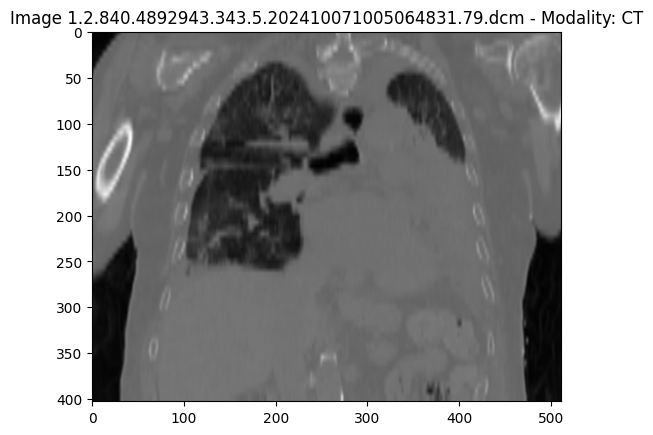

In [5]:
# show the image
plt.imshow(dicom_data.pixel_array, cmap='gray')
plt.title(f"Image {dicom_file_name} - Modality: {dicom_data.Modality}")
plt.show()